## Inicjalizacja środowiska programistycznego

In [2]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
# sys.path.append("../modules")
sys.path.insert(0, "/scratch/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

2025-04-14 16:38:27.496848: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-14 16:38:27.497185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-14 16:38:27.671581: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 16:38:27.947277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Analiza obrazów - Zbiór EMNIST

Jako zbiorów treningowych do analizy obrazów użyjemy rozszerzonego zbioru MNIST -
[EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset)
zawierającego dużą liczbę zdjęć ręcznie pisanych liter i cyfr. Zdjęcia mają rozdzielczość `28x28` pikseli,
a każdy piksel koduje poziom szarości w 8 bitowej skali.

# Przygotowanie danych

**Proszę:**

* pobrać zbiór [EMNIST](https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip)
* rozpakować plik .zip
* załadować do środowiska Colab, do katalogu `data` pliki (`label` i `images`) dla zbioru `emnist-digits-test`
* rozpakować w środowisku Colab pliki `.gzip`

**Uwaga:**

* pliki są duże. Optymalnie jest je pobrać bezpośrednio na Colab, lub na dysk Google

In [ ]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

--2025-03-25 09:59:05--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
54.85.30.225ometrics.nist.gov (biometrics.nist.gov)... 
connected. to biometrics.nist.gov (biometrics.nist.gov)|54.85.30.225|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  2.40MB/s    in 4m 46s  

2025-03-25 10:03:51 (1.88 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating: gzip/emnist-byclass-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-t

Dane wczytamy korzystając z gotowej funkcji `getEMNIST(datasetName, datasetPath)` która zwraca krotkę `(features, labels)` dla zbioru o nazwie odpowiadającej nazwie odpowiedniego pliku, np.:
  ```Python
  
  x, y = getEMNIST('emnist-digits-test', datasePath)
  
  ```
  <br></br>

**Proszę:**

* umieścić funkcję w module `modules/emnist_functions.py`  
* rozpakować dane treningowe dla liczb: `emnist-digits-test`
* wydzielić `30 000` przykładów na zbiór uczący
* wydzielić `10 000` przykładów na zbiór walidacyjny

**Uwagi:**

* dane są zapisane w binarnym formacie IDX. Do ich dekodowania można użyć pakietu `idx2numpy`. Pakiet można doinstalować
  do aktualnej sesji korzystając z komendy `pip`. W komórce notatnika komendy linii poleceń trzeba poprzedzić wykrzyknikiem:
  ```Shell
  
  !pip install idx2numpy
  ```
  <br></br>
* zamiast wydzielania explicite zbioru walidacyjnego można użyć parametru `validation_split` metody `keras.model.fit()`:
  ```Python
  
  history = model.fit(x=x_train, y=y_train,
                    epochs=nEpochs,
                    batch_size = batchSize,
                    validation_split=0.1,   # 10% zbioru treningowego wydzielone na zbiór walidacyjny
                    callbacks=callbacks,
                    verbose=0)
  ```

In [2]:
# !pip install idx2numpy
import idx2numpy

In [2]:
def getEMNIST(datasetName, datasetPath):

    import idx2numpy
    fileName = datasetPath+"/"+datasetName+'-images-idx3-ubyte'
    features = idx2numpy.convert_from_file(fileName)

    fileName = datasetPath+"/"+datasetName+'-labels-idx1-ubyte'
    labels = idx2numpy.convert_from_file(fileName)
    return (features, labels)

# ...rozwiązanie...
features, labels = getEMNIST("emnist-digits-test", "/scratch/modules/gzip")
features.shape
nTrainExamples = 10000
nValExamples = 30000
x_train = features[:nTrainExamples]
y_train = labels[:nTrainExamples]

x_val = features[-nValExamples:]
y_val = labels[-nValExamples:]

**Proszę:**

* napisać funkcję `plotMNIST(x, y, y_pred)`, która rysuje cztery losowe obrazy ze zbioru cech `x`, podpisane dwoma rodzajami etykiet
  zawartych w macierzach `y` i `y_pred`
* po dopracowaniu kodu funkcji umieścić ją w module `modules/emnist_functions.py`

**Wskazówka:**
* do rysowania obrazów można użyć funkcji `imshow(imgeData)`

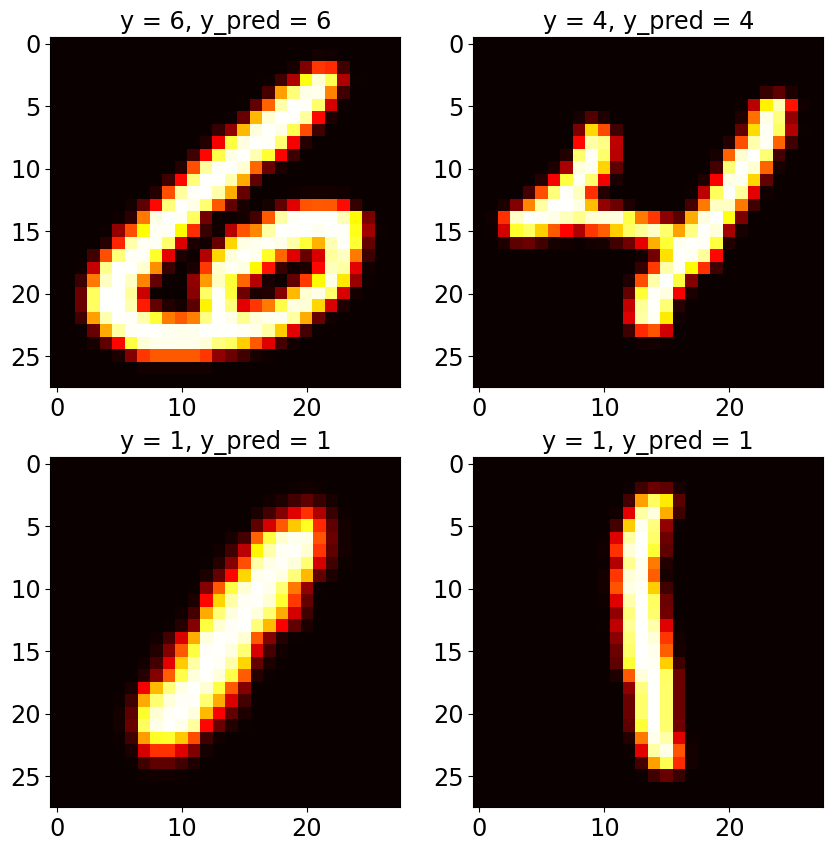

In [3]:
features, labels = getEMNIST("emnist-mnist-test", "/scratch/modules/gzip")
# plt.imshow(data[100, :, :].T)
labels.shape
import emnist_functions as emnist_fcn

emnist_fcn.plotMNIST(features, labels, labels)


**Proszę:**

* wywołać funkcje ładującą dane i rysującą rysunki korzystając z modułu `emnist_functions`

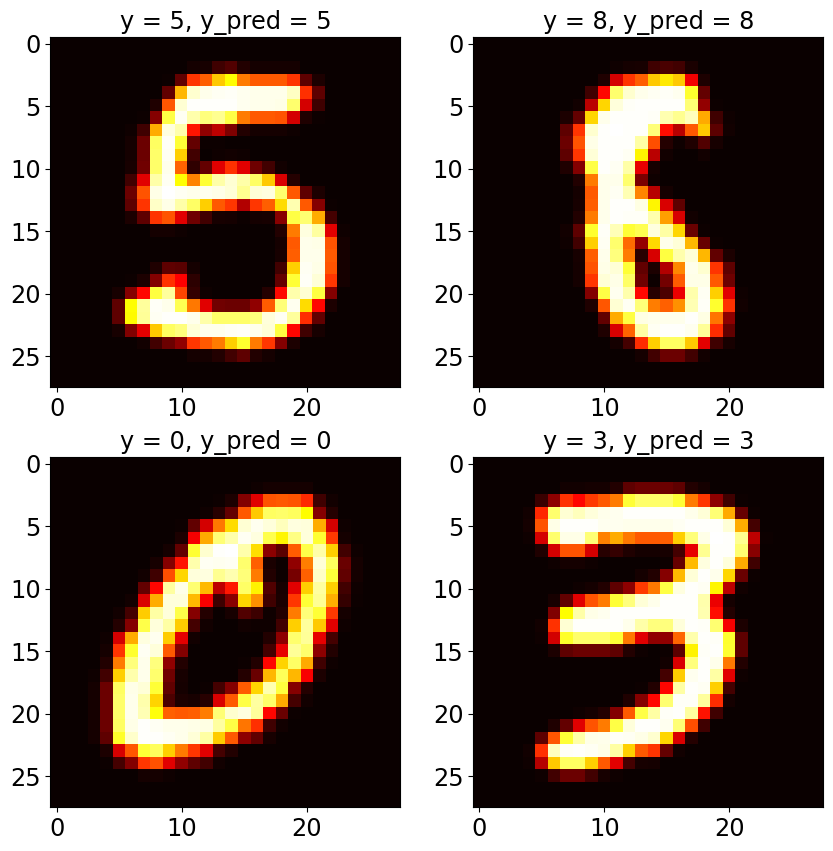

In [4]:
import emnist_functions as emnist_fcn

datasetName = "emnist-digits-test"
datasetPath = "/scratch/modules/gzip"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(x, y, y)

**Proszę:**

  * narysować histogramy krotności poszczególnych klas dla zbiorów treningowego i walidacyjnego

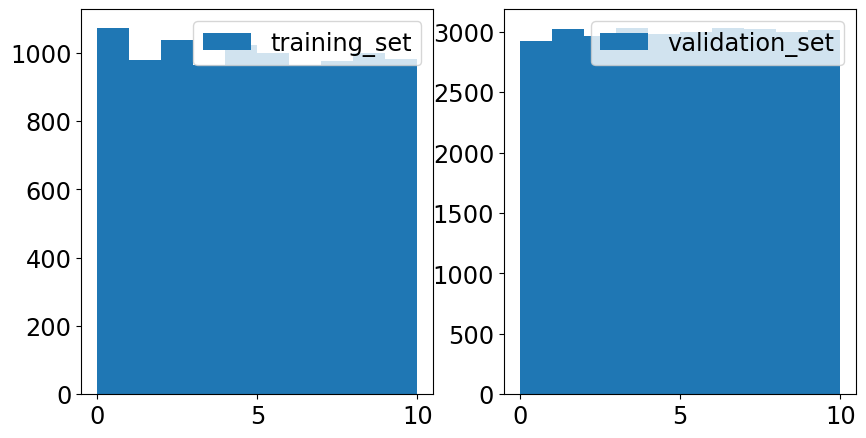

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(y_train, bins = 10, range = [0, 10], label = 'training_set')
axes[1].hist(y_val, bins = 10, range = [0, 10], label = 'validation_set')
axes[0].legend()
axes[1].legend()

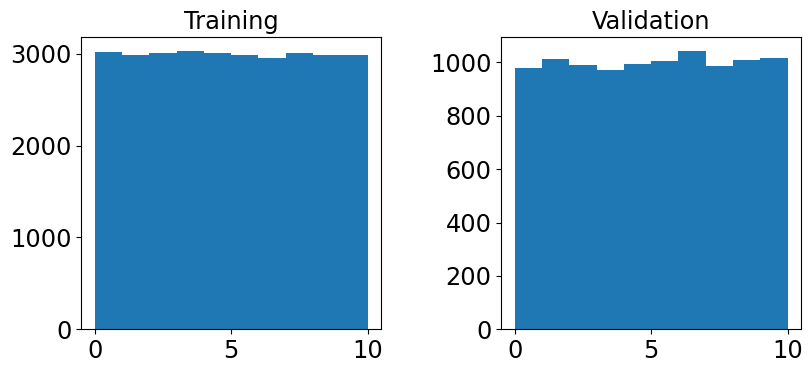

In [ ]:
...rozwiązanie...
pass

## Rozpoznawanie ręcznie pisanych cyfr

Mamy przed sobą zagadnienie kategoryzacji z wieloma klasami. Etykiety klas są podane w postaci numeru klasy:
```Python
print(y_train[:3])
[8 9 6]
```

Sieć, którą skonstruujemy, będzie estymowała prawdopodobieństwo przynależności do klasy na podstawie cech:

$$
{\huge
f_{g}(x) =  P(g|x)
}
$$

następnie użyjemy klasyfikacji Bayesa przypisując klasę o maksymalnym prawdopodobieństwie:

$$
{\huge
g = argmax_{g \in G} f_{g}(x)
}
$$

Jako funkcji straty użyjemy entropii krzyżowej dla wielu kategorii. Mamy do wyboru dwa warianty:

* `sparse_categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają numery klas

* `categorical_crossentropy` - implementacja zakładająca, że etykiety zawierają wektory prawdopodobieństw przynależności do klas:

```Python
x = tf.one_hot(y_train[:3], 10)
print(x)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(3, 10), dtype=float32)
```  

W naszym przypadku każdy przykład należy do jednej klasy, więc wektor prawdopodobieństw zawiera zera, z wyjątkiem elementu odpowiadającego klasie, do której należy przykład. Taka reprezentacja nazywa się gorąco jedynkową, ang. `one_hot`


* warstwa wyjściowa ma teraz liczbę neuronów równą liczbie klas - każdy neuron zwraca prawdopodobieństwo przynależności do danej klasy
* funkcja aktywacji warstwy wyjściowej powinna być ustawiona na `softmax` by zapewnić normalizację prawdopodobieństwa przykładu do 1:

$$
{\huge
\sum _{g} f_{g}(x) =  1
}
$$

**Proszę:**

* skonstruować sieć w pełni połączoną rozpoznającą ręcznie napisaną cyfrę. Sieć powinna mieć ``128`` neuronów w każdej z
  ``16`` warstw.
* budowa sieci powinna być wykonana z użyciem funkcji `getModel(...)`
* wypisać na ekran podsumowanie sieci

**Uwaga:** proszę zwrócić uwagę na kształt danych wejściowych

2025-04-14 06:50:20.497151: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (34)


Epoch 1/20
157/157 [==============================] - 11s 33ms/step - loss: 1.6313 - Accuracy: 0.3557 - val_loss: 1.1212 - val_Accuracy: 0.5790
Epoch 2/20
157/157 [==============================] - 4s 25ms/step - loss: 0.7491 - Accuracy: 0.7644 - val_loss: 0.5255 - val_Accuracy: 0.8712
Epoch 3/20
157/157 [==============================] - 5s 30ms/step - loss: 0.4996 - Accuracy: 0.8673 - val_loss: 0.4115 - val_Accuracy: 0.9113
Epoch 4/20
157/157 [==============================] - 4s 27ms/step - loss: 0.3185 - Accuracy: 0.9228 - val_loss: 0.4459 - val_Accuracy: 0.8831
Epoch 5/20
157/157 [==============================] - 2s 16ms/step - loss: 0.2759 - Accuracy: 0.9324 - val_loss: 0.2785 - val_Accuracy: 0.9368
Epoch 6/20
157/157 [==============================] - 4s 26ms/step - loss: 0.2723 - Accuracy: 0.9246 - val_loss: 0.3568 - val_Accuracy: 0.9221
Epoch 7/20
157/157 [==============================] - 4s 29ms/step - loss: 0.2587 - Accuracy: 0.9385 - val_loss: 0.2781 - val_Accuracy: 0.930

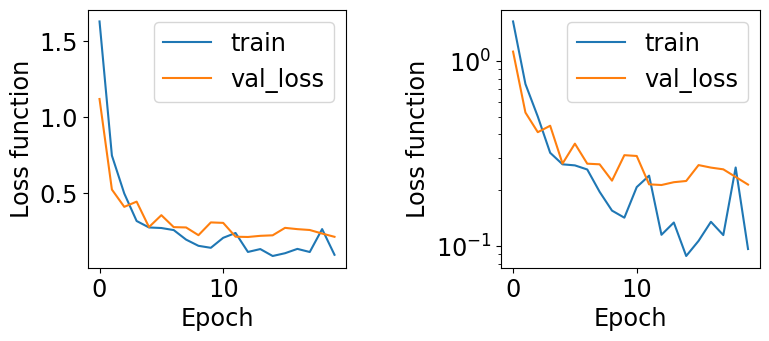

In [ ]:

def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, kernel_regularizer=None, metrics = ["Accuracy"]):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = tf.keras.layers.Flatten()(inputs)
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer="HeNormal",
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
        # x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer), rate = 0.2)(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                # loss='sparse_categorical_crossentropy')
                loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = metrics)

    return model


def mnistSolver(x_train, y_train, x_val, y_val, epochs=20):

    InputShape = (28, 28)
    nNeurons = np.full((16), 128)
    outputNeurons = 10
    initial_learning_rate = 0.001
    batchSize = 64
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=200,
                    decay_rate=0.95,
                    staircase=True)
    model = getModel(InputShape, nNeurons, lr_schedule, outputNeurons=outputNeurons, outputActivation='softmax', metrics = ["Accuracy"])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batchSize, validation_data=(x_val, y_val), verbose=1)
    #Plotting
    plf.plotTrainHistory(history)
    return model

model = mnistSolver(x_train, y_train, x_val, y_val, epochs=20, )


In [ ]:
...rozwiązanie...
pass

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* przeprowadzić trening przez `20` epoka i narysować zmianę funkcji straty w kolejnych epokach
* trening powinien uwzględniać harmonogram współczennika uczenia
* trening **nie** powinien używać wczesnego zatrzymania - chcemy zbadać efekty zbyt długiego treningu
* obliczyć dokładność, `accuracy` na zbiorach treningowym i walidacyjnym
* skomentować wykresy funkcji straty - **Czy widać na nich oznaki przetrenowania?**

In [47]:
"sori wczesniej w komorce jest zrobione"
print("Evaluation on training dataset")
print(model.evaluate(x_train, y_train, verbose= 0))
print("Evaluation on validation dataset")
print(model.evaluate(x_val, y_val, verbose= 0))

Evaluation on training dataset
[0.03552195057272911, 0.9908000230789185]
Evaluation on validation dataset
[0.2242727279663086, 0.9606666564941406]


I0000 00:00:1742894668.188260 4146211 service.cc:145] XLA service 0x753f1c019250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742894668.188278 4146211 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
I0000 00:00:1742894668.188280 4146211 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-03-25 10:24:28.238674: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-25 10:24:28.607609: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1742894669.976650 4150409 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1125', 436 bytes spill stores, 436 bytes spill loads

I0000 00:00:1742894671.095423 4146211 asm_compiler.cc:369] ptxas 

Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9863 - loss: 0.0563   
Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9711 - loss: 0.1296
CPU times: user 52.8 s, sys: 1.91 s, total: 54.7 s
Wall time: 25.8 s


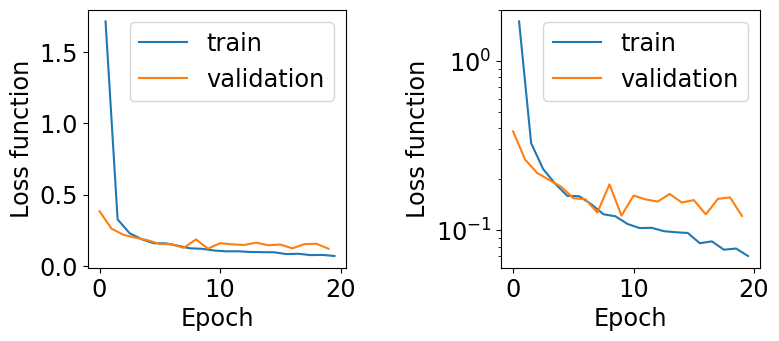

In [ ]:
%%time
...rozwiązanie...
pass

**Proszę:**

* użyć kryterium Bayesa do skonstruowania finalnej odpowiedzi modelu na pytanie **Do której klasy należy dany przykład?**
* narysować macierz pomyłek dla zbioru treningowego i walidacyjnego
* macierze pomyłek proszę znormalizować względem prawdziwych etykiet.

**Wskazówka:** do rysowania macierzy pomyłek można użyć klasy `sklearn.metrics.ConfusionMatrixDisplay`

In [66]:
# 
from sklearn.metrics import ConfusionMatrixDisplay as CMD
y_pred_val = model.predict(x_val)
y_pred_train = model.predict(x_train)


313/313 [==============================] - 2s 5ms/step


Text(0.5, 1.0, 'training')

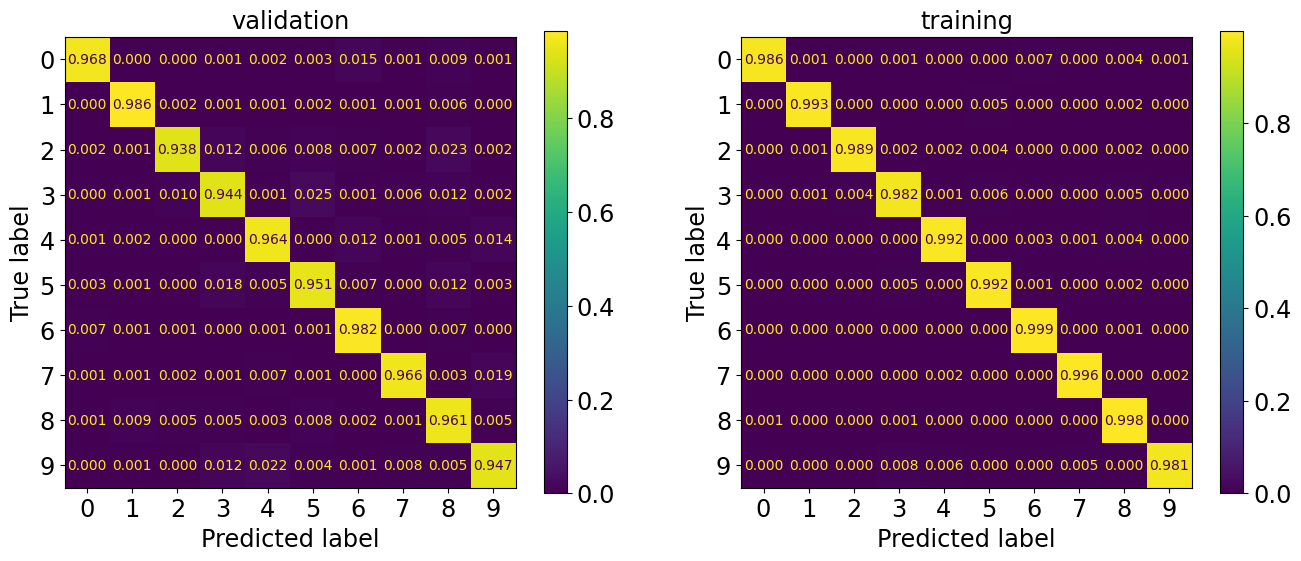

In [72]:
# 
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
y_class = np.argmax(y_pred_val, axis = 1)
CMD.from_predictions(y_val, y_class, ax = axes[0], colorbar = True, normalize = 'true', values_format='.3f')
axes[0].set_title("validation")
y_class = np.argmax(y_pred_train, axis = 1)
CMD.from_predictions(y_train, y_class, ax = axes[1], colorbar = True, normalize = 'true', values_format='.3f')
axes[1].set_title("training")

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


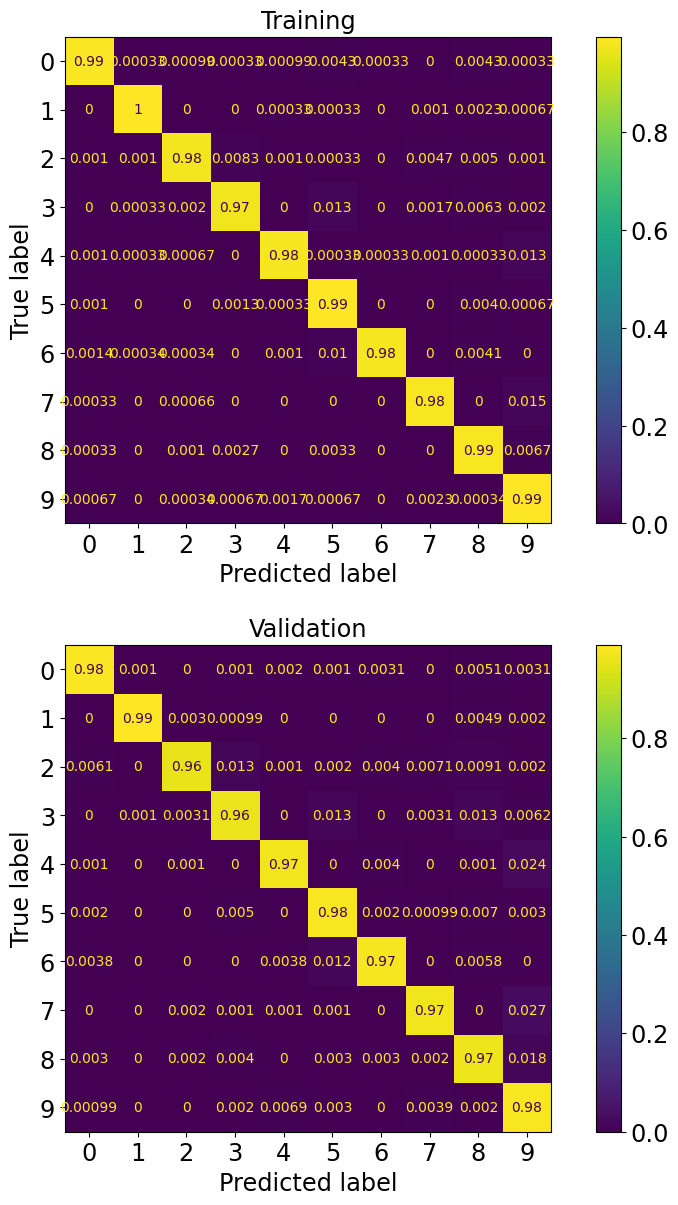

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* narysować cztery losowe przykłady z informacją etykietach: prawdziwej i przyznanej przez model
* narysować cztery przykłady, w których odpowiedź modelu **nie** jest poprawna

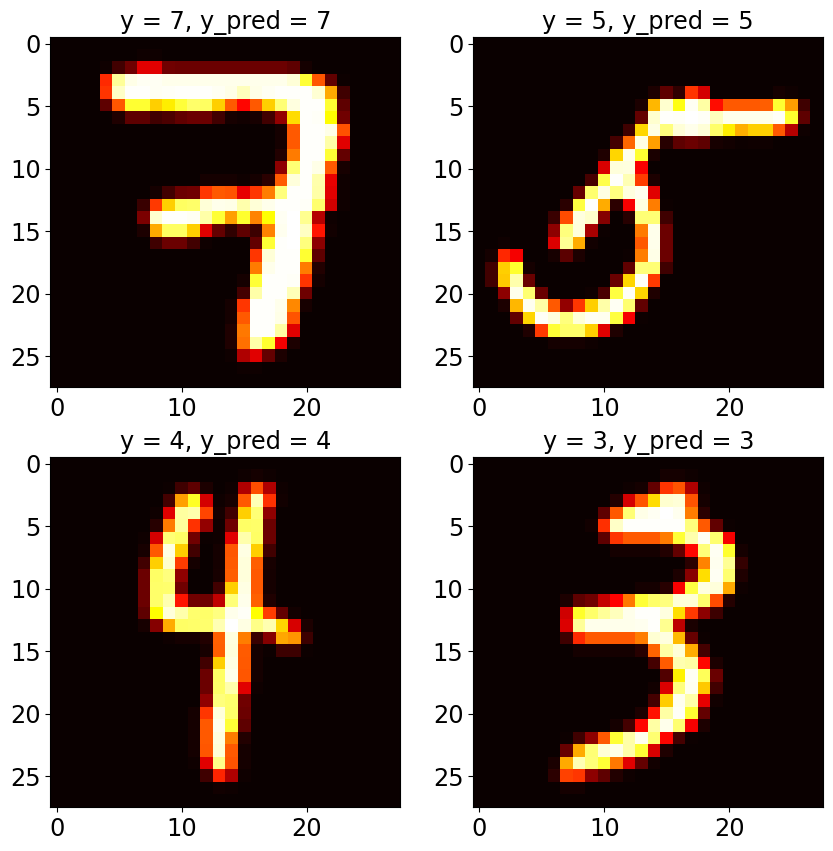

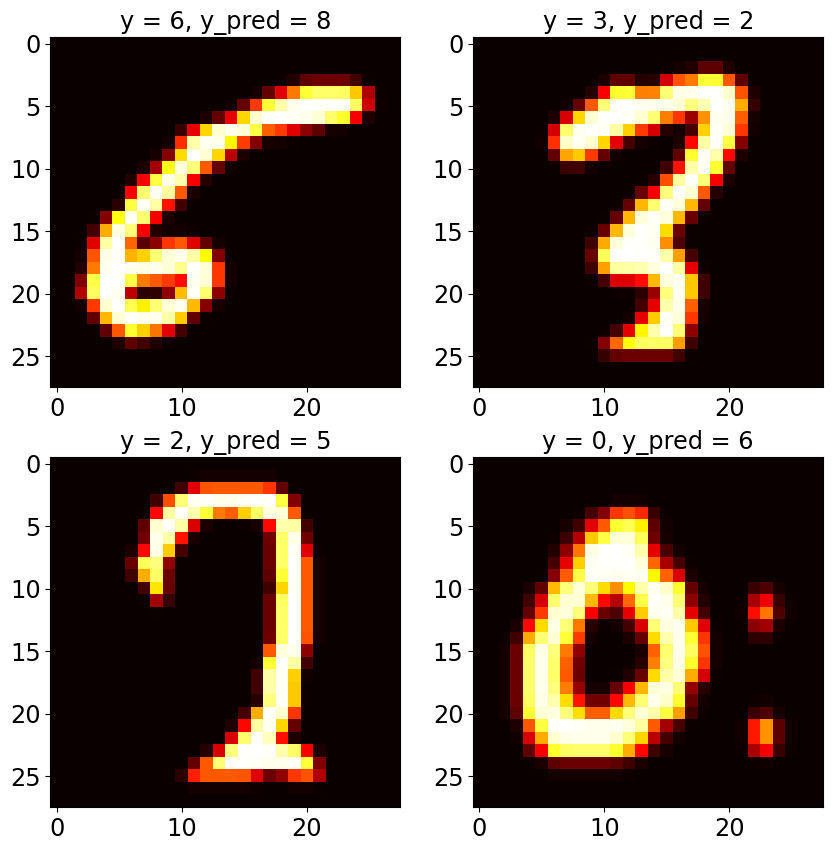

In [77]:
emnist_fcn.plotMNIST(x_train, y_train, y_class)
wrong = y_train != y_class
emnist_fcn.plotMNIST(x_train[wrong, :], y_train[wrong], y_class[wrong])


/tmp/ipykernel_4144695/3906011576.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,1].legend(bbox_to_anchor=(1.5,1), loc='upper left', title="Label: True/Predicted")


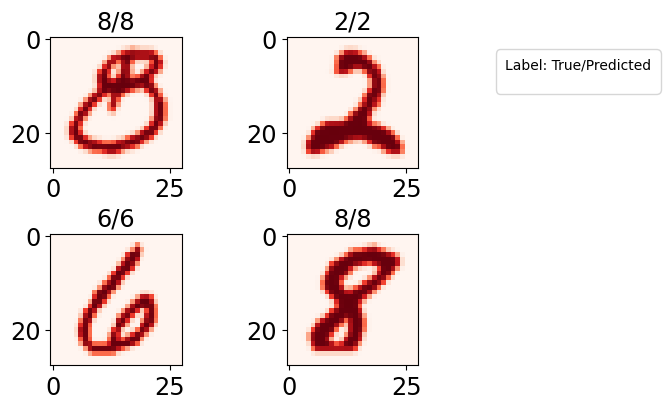

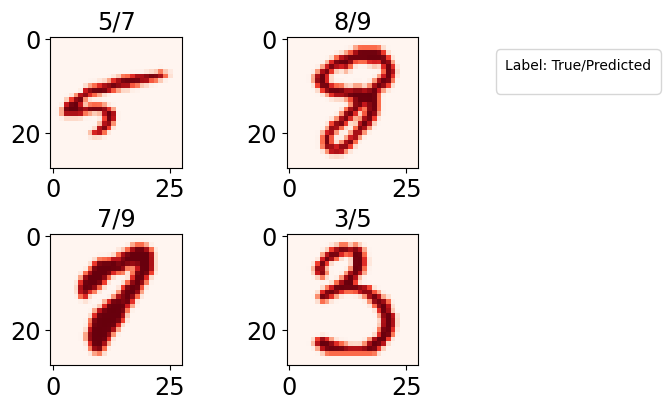

In [ ]:
...rozwiązanie...
pass

## Zapis modelu

Model stworzony w Keras może być zapisany w całości - struktura i wagi lub jako same wagi.
W nazwie pliku modelu warto zakodować podstawowe meta dane o treningu, np. datę i liczbę epok.

In [84]:
nEpochs = 20
currentTime = datetime.now().strftime("%b_%d_%Y_%H_%M")
path = "/scratch/modules/training/{epoch:04d}_"+currentTime+".keras"
model.save(path.format(epoch=nEpochs))

## Wczytywanie modelu

Model można wczytać w dowolnym innym miejscu kodu. Wczytany model pozwala na te same operacje co oryginalny model "z kodu",
w szczególności:

* kontynuację treningu
* wykonanie predykcji

In [86]:
nEpochsSaved = 20
# checkpoint_path = "training/{epoch:04d}_"+currentTime+".keras"
checkpoint_path = path
model = tf.keras.models.load_model(checkpoint_path.format(epoch=nEpochsSaved))
model.summary()
print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 layer_0 (Dense)             (None, 128)               100480    
                                                                 
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 128)               16512     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 layer_4 (Dense)             (None, 128)               16512   

[0.2242727279663086, 0.9606666564941406]

## Zapis modelu w trakcie treningu

Model można automatycznie zapisywać w trakcie procesu treningu - służą do tego dedykowane funkcje wywołań zwrotnych - ```callbacks```. Funkcja ```tf.keras.callbacks.ModelCheckpoint``` zapisuje model w trakcie treningu:

```Python
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath=checkpoint_filepath, # ścieżka do plików modelu. Wymaga odpowiedniego formatowania
                                                          # jeśli pliki modeli nie mają być nadpisywane, np.:
                                                          # checkpoints/model_{epoch:02d}.keras
                                                          # jeśli zapisyujemy tylko wagi nazwa pliku musi kończyć się na weights.h5
                            save_weights_only=True,       # flaga sterująca zapisem całej struktury modelu, lub jedynie jego wag
                            monitor='val_accuracy',       # kryterium wyboru najlepszego modelu na danym etapie treningu
                            mode='max',                   # kierunek kryterium: max - więcej znaczy lepiej, min - odwrotnie
                            save_best_only=True)          # zapisuje model jeśli jest lepszy niż model poprzednio zapisany
```    

In [95]:
currentTime = datetime.now().strftime("%b_%d_%Y_%H_%M")
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, min_delta = 1E-3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                            filepath="/scratch/modules/training/model_checkpoint_epoch_{epoch:02d}_"+"weights.h5", # ścieżka do plików modelu. Wymaga odpowiedniego formatowania
                                                          # jeśli pliki modeli nie mają być nadpisywane, np.:
                                                          # checkpoints/model_{epoch:02d}.keras
                                                          # jeśli zapisyujemy tylko wagi nazwa pliku musi kończyć się na weights.h5
                            save_weights_only=True,       # flaga sterująca zapisem całej struktury modelu, lub jedynie jego wag
                            monitor='val_accuracy',       # kryterium wyboru najlepszego modelu na danym etapie treningu
                            mode='max',                   # kierunek kryterium: max - więcej znaczy lepiej, min - odwrotnie
                            save_best_only=True)          # zapisuje model jeśli jest lepszy niż model poprzednio zapisany

**Proszę:**

* dodać wywołanie zwrotne `ModelCheckpoint` do konfiguracji treningu modelu
* zadbać o odpowiednie nazewnictwo plików modelu

Epoch 1/20
157/157 [==============================] - 17s 40ms/step - loss: 1.5799 - accuracy: 0.3622 - val_loss: 1.1068 - val_accuracy: 0.5142
Epoch 2/20
157/157 [==============================] - 5s 33ms/step - loss: 0.9576 - accuracy: 0.6253 - val_loss: 0.7629 - val_accuracy: 0.7629
Epoch 3/20
157/157 [==============================] - 5s 33ms/step - loss: 0.6354 - accuracy: 0.8224 - val_loss: 0.6985 - val_accuracy: 0.8025
Epoch 4/20
157/157 [==============================] - 5s 32ms/step - loss: 0.4928 - accuracy: 0.8770 - val_loss: 0.4776 - val_accuracy: 0.8649
Epoch 5/20
157/157 [==============================] - 5s 33ms/step - loss: 0.3542 - accuracy: 0.9148 - val_loss: 0.4307 - val_accuracy: 0.8848
Epoch 6/20
157/157 [==============================] - 5s 32ms/step - loss: 0.2788 - accuracy: 0.9357 - val_loss: 0.3855 - val_accuracy: 0.9147
Epoch 7/20
157/157 [==============================] - 5s 31ms/step - loss: 0.4322 - accuracy: 0.8863 - val_loss: 0.5725 - val_accuracy: 0.885

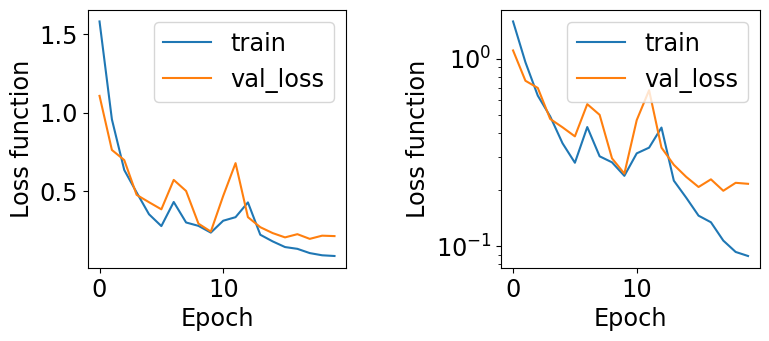

In [96]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, kernel_regularizer=None, metrics = ["Accuracy"]):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = tf.keras.layers.Flatten()(inputs)
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer="HeNormal",
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
        # x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer), rate = 0.2)(x)
            
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                # loss='sparse_categorical_crossentropy')
                loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics = metrics)

    return model


def mnistSolver(x_train, y_train, x_val, y_val, epochs=20):

    InputShape = (28, 28)
    nNeurons = np.full((16), 128)
    outputNeurons = 10
    initial_learning_rate = 0.001
    batchSize = 64
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=200,
                    decay_rate=0.95,
                    staircase=True)
    model = getModel(InputShape, nNeurons, lr_schedule, outputNeurons=outputNeurons, outputActivation='softmax', metrics = ["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batchSize, validation_data=(x_val, y_val), verbose=1, callbacks=[early_stop_callback, model_checkpoint_callback])
    #Plotting
    plf.plotTrainHistory(history)
    return model

model = mnistSolver(x_train, y_train, x_val, y_val, epochs=20, )


In [ ]:
...rozwiązanie...
pass


Epoch 1: val_accuracy improved from -inf to 0.97120, saving model to training/checkpoints/model_checkpoint_epoch_01.weights.h5

Epoch 2: val_accuracy did not improve from 0.97120

Epoch 3: val_accuracy improved from 0.97120 to 0.97550, saving model to training/checkpoints/model_checkpoint_epoch_03.weights.h5

Epoch 4: val_accuracy did not improve from 0.97550

Epoch 5: val_accuracy did not improve from 0.97550

Epoch 6: val_accuracy did not improve from 0.97550

Epoch 7: val_accuracy did not improve from 0.97550

Epoch 8: val_accuracy improved from 0.97550 to 0.97630, saving model to training/checkpoints/model_checkpoint_epoch_08.weights.h5

Epoch 9: val_accuracy did not improve from 0.97630

Epoch 10: val_accuracy did not improve from 0.97630

Epoch 11: val_accuracy did not improve from 0.97630

Epoch 12: val_accuracy improved from 0.97630 to 0.97640, saving model to training/checkpoints/model_checkpoint_epoch_12.weights.h5

Epoch 13: val_accuracy improved from 0.97640 to 0.97850, sa

## Wczytywanie wag.

Jeśli w trakcie treningu zapisywano same wagi, trzeba je wczytać do istniejącego modelu:
```Python
checkpoint_path = "training/checkpoints/model_checkpoint_epoch_01.weights.h5"
model.load_weights(checkpoint_path)
model.summary()
```

**Proszę:**

* stworzyć nowy model
* obliczyć dokładność na zbiorze walidacyjnym - jakiej wartości się spodziewamy dla `surowego` modelu?
* wczytać wagi modelu zapisane przez funkcję ``tf.keras.callbacks.ModelCheckpoint``
* obliczyć dokładność na zbiorze walidacyjnym. Czy widać, że model zawiera wagi będące efektem treningu?

In [ ]:
InputShape = (28, 28)
nNeurons = np.full((16), 128)
outputNeurons = 10
initial_learning_rate = 0.001
batchSize = 64
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model0 =  getModel(InputShape, nNeurons, lr_schedule, outputNeurons=outputNeurons, outputActivation='softmax', metrics = ["accuracy"])
print(model0.evaluate(x_train, y_train, verbose= 0))

[2.3116283416748047, 0.09650000184774399]


In [107]:
checkpoint_path = "/scratch/modules/training/model_checkpoint_epoch_19_weights.h5"
model0.load_weights(checkpoint_path)
model0.summary()
print(model0.evaluate(x_train, y_train, verbose= 0))

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 layer_0 (Dense)             (None, 128)               100480    
                                                                 
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 128)               16512     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 layer_4 (Dense)             (None, 128)               16512   

In [ ]:
...rozwiązanie...
pass

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1066 - loss: 131.2704    


/home/akalinow/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 69 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,450 (1.33 MB)

 Trainable params: 349,450 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9687 - loss: 0.1689


# Zadanie domowe

Trening klasyfikatora na zbiorze wielkich liter i cyfr ze zbioru `emnist-byclass-train`.

**Proszę:**

* wczytać zbióry `emnist-byclass-train` i `emnist-byclass-test`(uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i wielkie litery
* zdefiniować i przeprowadzić trening modelu.
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```
Decoded message is: HELLO WORLD

```

**UWAGA**: Kod musi używać funkcji zdefiniowanych w module `emnist_functions`
i działać z przygotowanymi poniżej komórkami. Należy zdefiniować następujące funkcje:
  
* ```emnist_functions.getEMNIST(datasetName, datasetPath)``` - funkcja łądująca dane
* ```emnist_functions.preprocessData(x,y)``` - funkcja wybierająca podzbiór wielkich liter i cyfr
* ```emnist_functions.getModel(...)``` - funkcja zwracająca model do treningu
* ```emnist_functions.trainModel(...)``` - funkcja trenująca i rysująca historię funkcji straty
* ```emnist_functions.plotTrainHistory(history)```
* ```emnist_functions.plotMNIST_CM(y_train,y_pred, label)``` - funkcja rysująca macierz pomyłek. Parametr `label` to napis "Training" lub "Validation"
* ```emnist_functions.decodeMessage(model, encoded)``` - funkcja dekodująca komunikat
* moduł `emnist_functions` powinien zawierać zmienne definiujące sieć:
  
  ```Python
  inputShape = ...
  nNeurons = ...
  lastClassNumber = 36
  nOutputNeurons = ...
  nEpochs = ...
  ```

In [3]:
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);


datasetPath = "/scratch/modules/gzip"

lastClassNumber = emnist_fcn.lastClassNumber
datasetName = "emnist-byclass-train"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)
datasetName = "emnist-byclass-test"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)


Training dataset
Test dataset


Epoch 1/5
8344/8344 [==============================] - 56s 6ms/step - loss: 0.4989 - Accuracy: 0.8444
Epoch 2/5
8344/8344 [==============================] - 50s 6ms/step - loss: 0.2814 - Accuracy: 0.8996
Epoch 3/5
8344/8344 [==============================] - 51s 6ms/step - loss: 0.2584 - Accuracy: 0.9065
Epoch 4/5
8344/8344 [==============================] - 51s 6ms/step - loss: 0.2551 - Accuracy: 0.9075
Epoch 5/5
8344/8344 [==============================] - 53s 6ms/step - loss: 0.2546 - Accuracy: 0.9077
Evaluation on test dataset:
2790/2790 [==============================] - 11s 4ms/step - loss: 0.2777 - Accuracy: 0.9017


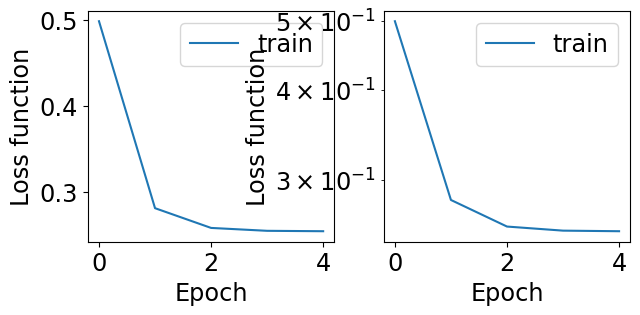

In [ ]:
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShape
nNeurons = emnist_fcn.nNeurons
nOutputNeurons = emnist_fcn.nOutputNeurons
nEpochs = emnist_fcn.nEpochs


model = emnist_fcn.getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                            nNeurons=nNeurons,
                            hiddenActivation="relu",
                            outputActivation="softmax")

model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);

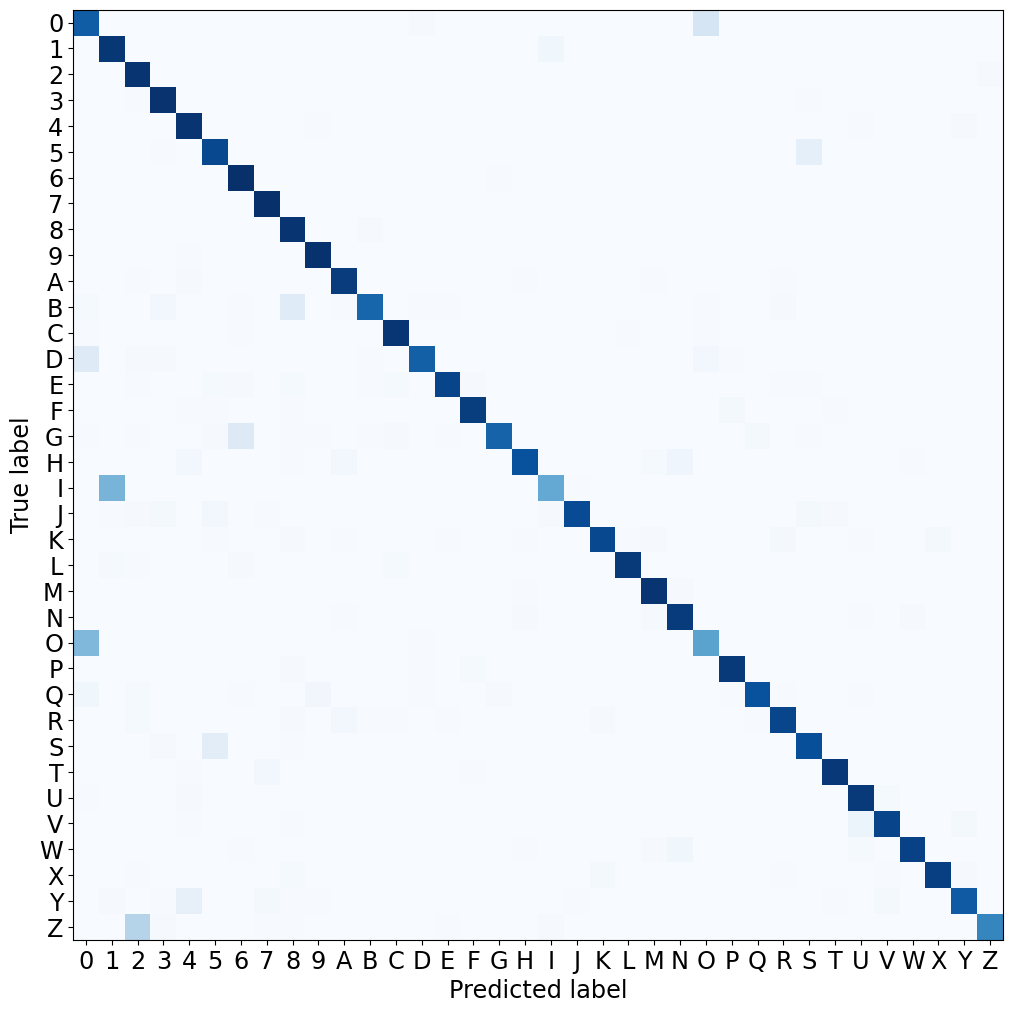

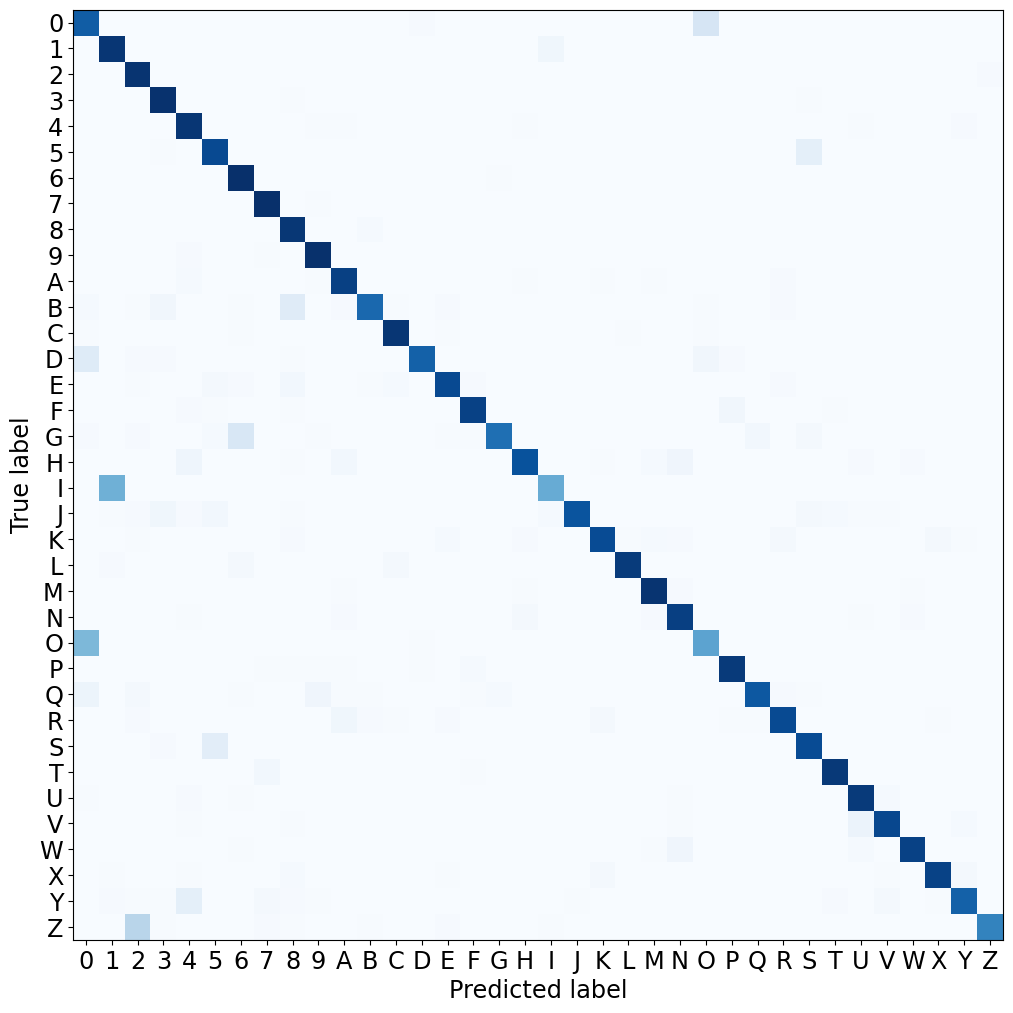

In [ ]:

y_pred = tf.argmax(model.predict(x_train, batch_size=64, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=64, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    4   4   4   4   4   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   9
   32  37  37  37  32  20   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  65 109 140
  204 215 217 217 201 154  22   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3  12 122 190 222
  245 249 250 250 242 206  46   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   8  79 127 222 247 253
  235 228 249 254 254 245 114   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  35  91 219 244 25

1/1 [==============================] - 0s 34ms/step


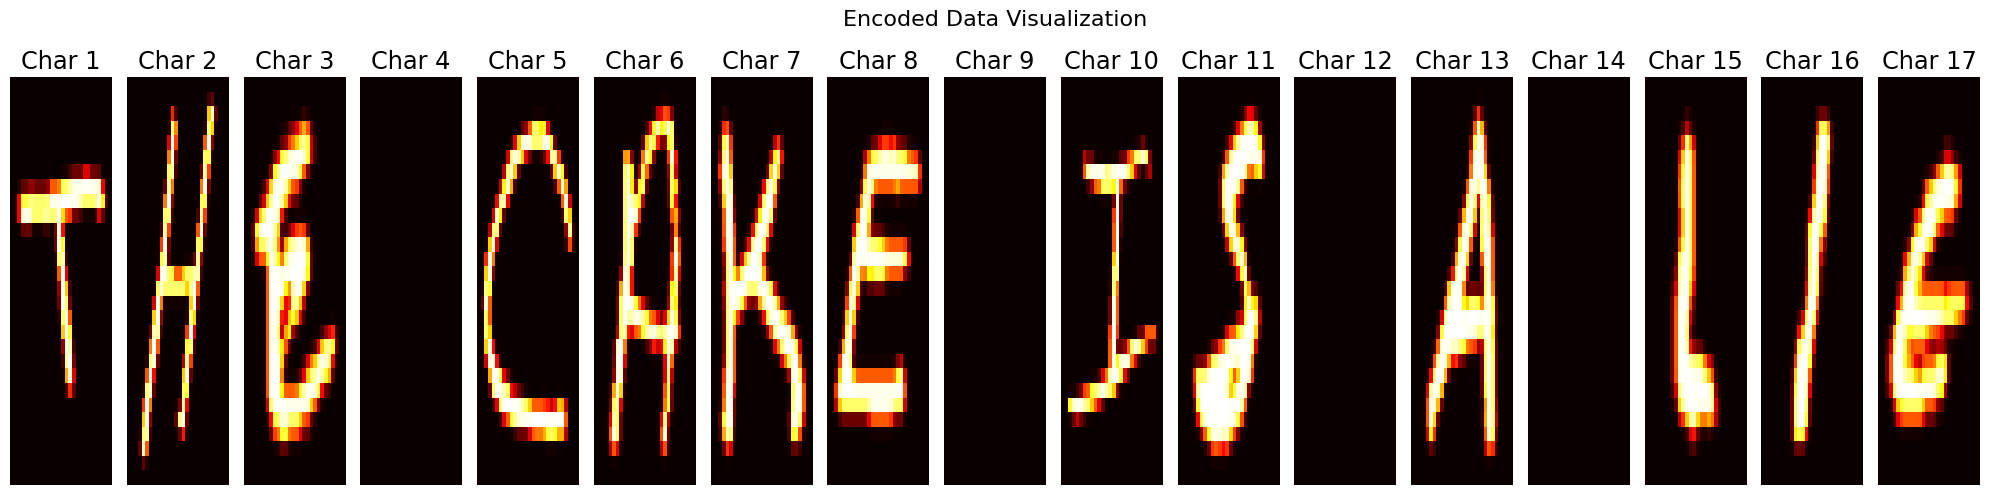

decoded message is: TH8 CAKE IS A L1E


In [ ]:
importlib.reload(emnist_fcn);
fileName = "/scratch/modules/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

print(emnist_fcn.decodeMessage(model, encoded))

    

In [ ]:
#Input data loading
...rozwiązanie...
pass

2025-03-25 10:27:27.819489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.364822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:28.889133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.
2025-03-25 10:27:29.653688: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 547178688 exceeds 10% of free system memory.


Training data shapes: (533993, 28, 28) (533993,)
Test data shapes: (89264, 28, 28) (89264,)
Number of categories: 36


2025-03-25 10:27:42.107879: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1507139648 exceeds 10% of free system memory.
I0000 00:00:1742894868.233507 4146216 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_6', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads

I0000 00:00:1742894883.838747 4146213 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_5', 864 bytes spill stores, 1736 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_4', 864 bytes spill stores, 1736 bytes spill loads



Evaluation on training dataset:
16688/16688 ━━━━━━━━━━━━━━━━━━━━ 14s 819us/step - accuracy: 0.7859 - loss: 1.3203
Evaluation on test dataset:
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - accuracy: 0.7860 - loss: 1.3206
CPU times: user 12min 27s, sys: 35.8 s, total: 13min 3s
Wall time: 11min 51s


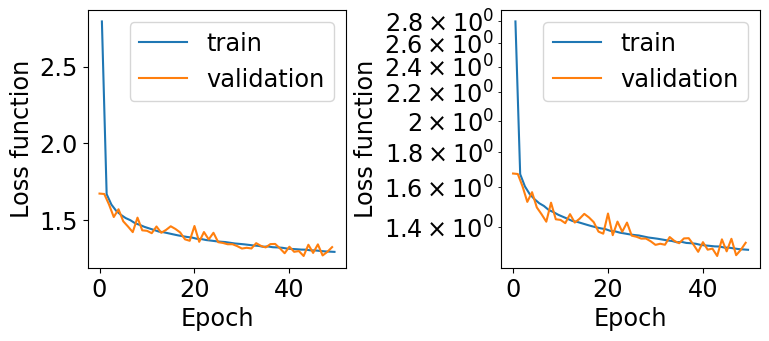

In [ ]:
%%time
importlib.reload(emnist_fcn);

#model definition and training
...rozwiązanie...
pass

I0000 00:00:1742895586.629734 4187846 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 64 bytes spill loads



4122/4172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I0000 00:00:1742895592.237454 4188120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_45', 48 bytes spill stores, 48 bytes spill loads



4172/4172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


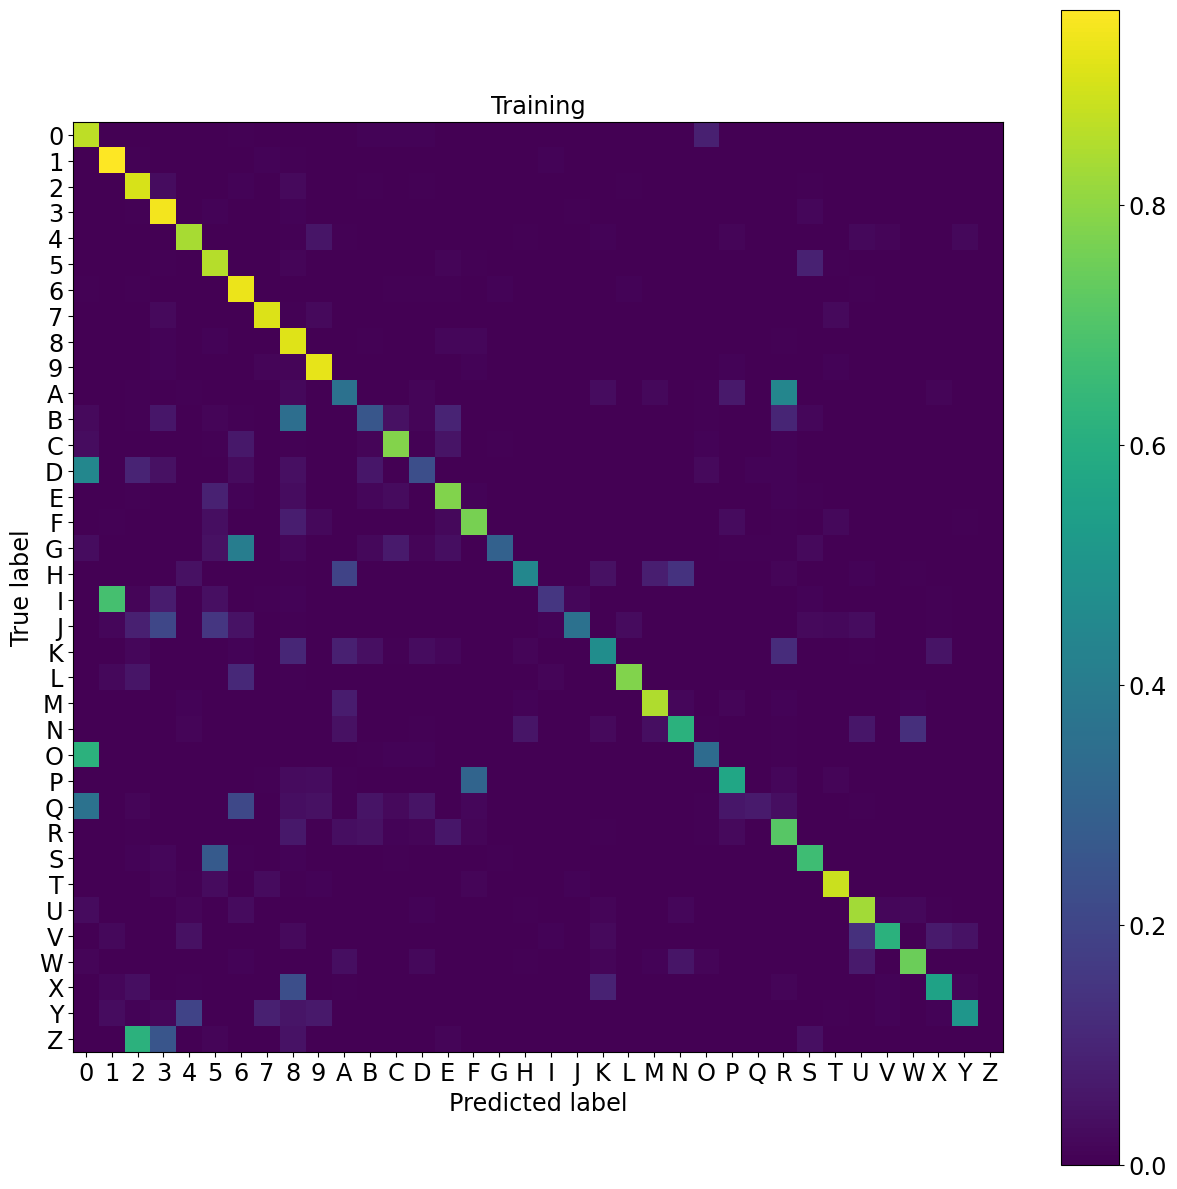

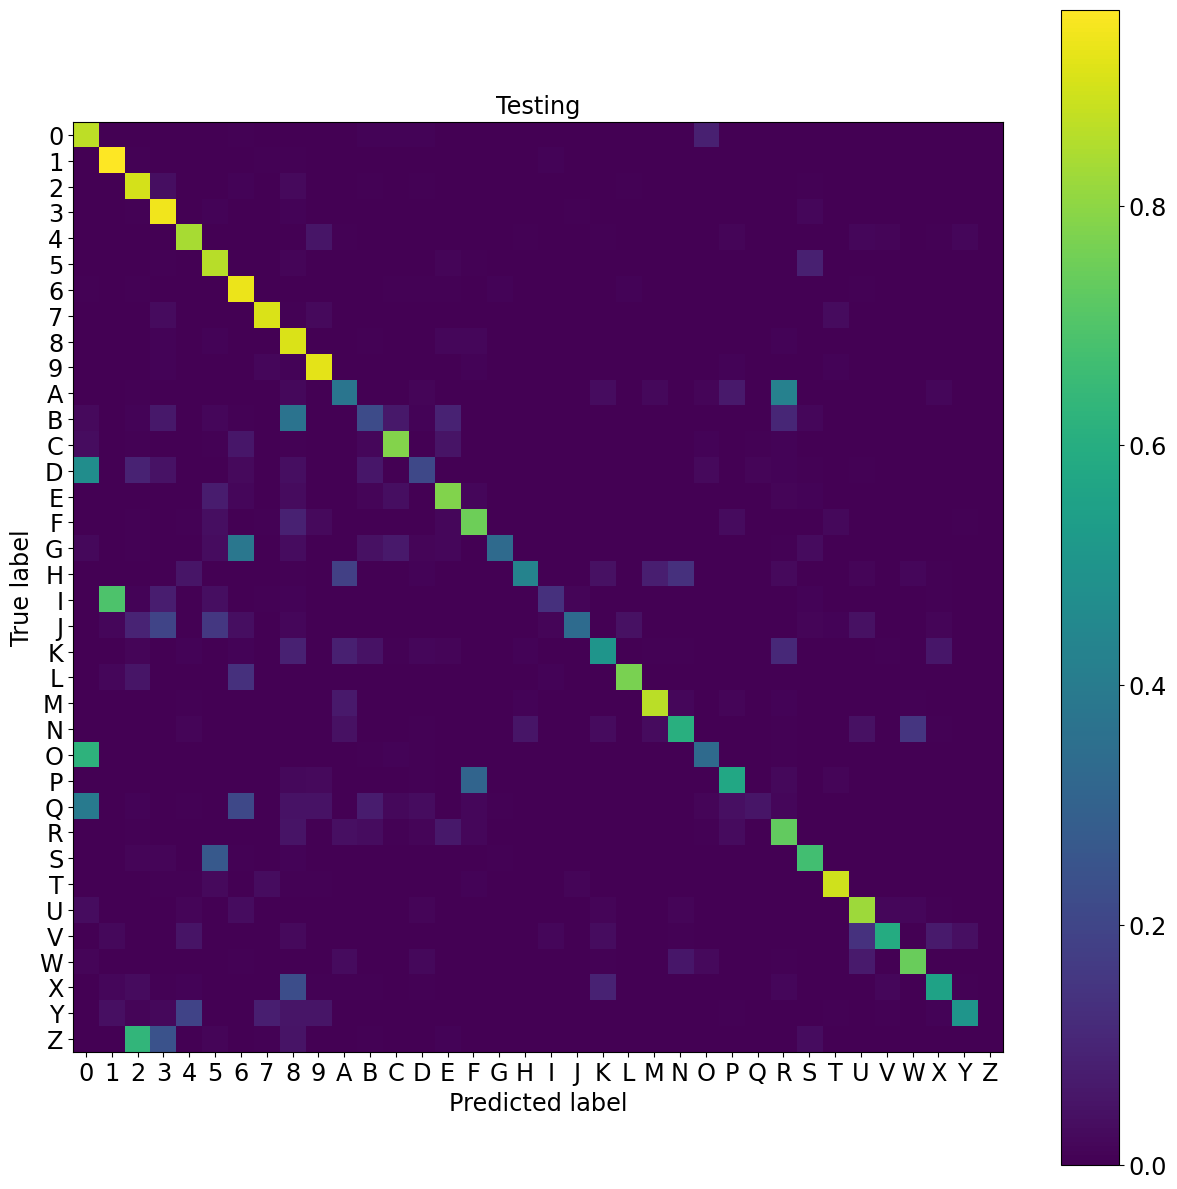

In [ ]:
#evaluation
...rozwiązanie...
pass

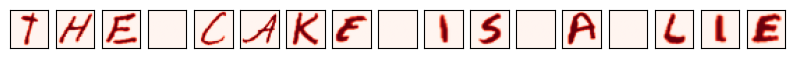

In [ ]:
...rozwiązanie...
pass

In [ ]:
#message decoding
...rozwiązanie...
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Decoded message is: 76E CABE 1S A 21E


In [1]:
import sys
import importlib
import tensorflow as tf
sys.path.insert(0, "/scratch/modules")

2025-04-15 09:24:43.421932: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-15 09:24:43.422316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-15 09:24:43.551440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 09:24:43.907340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
"testing machen"

#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

# datasetName = "emnist-byclass-train"
# datasetPath = "../data/EMNIST/gzip/"
# lastClassNumber = emnist_fcn.lastClassNumber

# x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
# print(colored("Training dataset","green"))
# x_train, y_train = emnist_fcn.preprocessData(x,y)

# datasetName = "emnist-byclass-test"
# datasetPath = "../data/EMNIST/gzip/"
# x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
# print(colored("Test dataset","green"))
# x_test, y_test = emnist_fcn.preprocessData(x,y)
datasetPath = "/scratch/modules/gzip"
from termcolor import colored
lastClassNumber = emnist_fcn.lastClassNumber
datasetName = "emnist-byclass-train"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)
datasetName = "emnist-byclass-test"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

Training dataset
Test dataset


In [4]:
%%time
#model definition and training
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShape
nNeurons = emnist_fcn.nNeurons
nOutputNeurons = emnist_fcn.lastClassNumber
nEpochs = emnist_fcn.nEpochs


model = emnist_fcn.getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons,
                            nNeurons=nNeurons,
                            hiddenActivation="relu",
                            outputActivation="softmax")

model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test)

2025-04-15 09:25:21.043582: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (34)
2025-04-15 09:25:22.396827: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418650512 exceeds 10% of free system memory.


Epoch 1/10
3901/8344 [=============>................] - ETA: 33s - loss: 0.6701 - Accuracy: 0.8054

KeyboardInterrupt: 

2025-04-15 09:09:25.758865: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 418650512 exceeds 10% of free system memory.


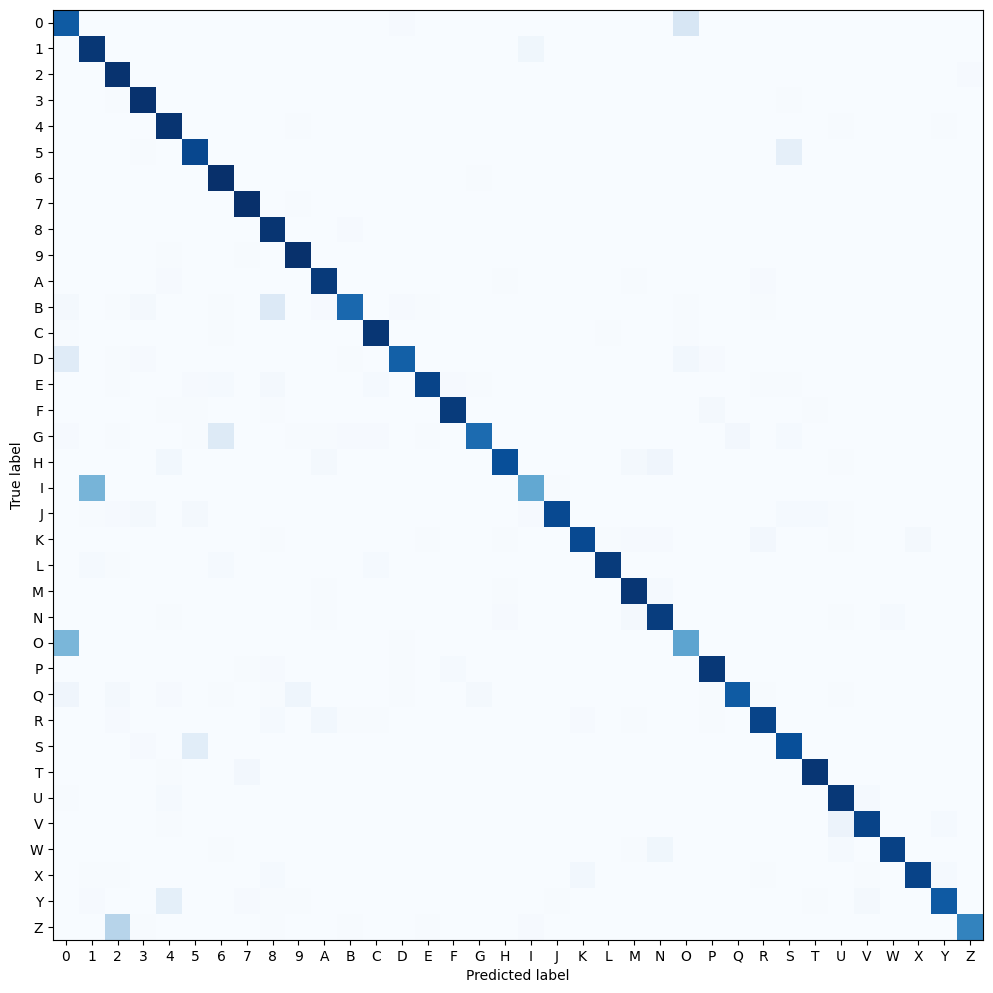

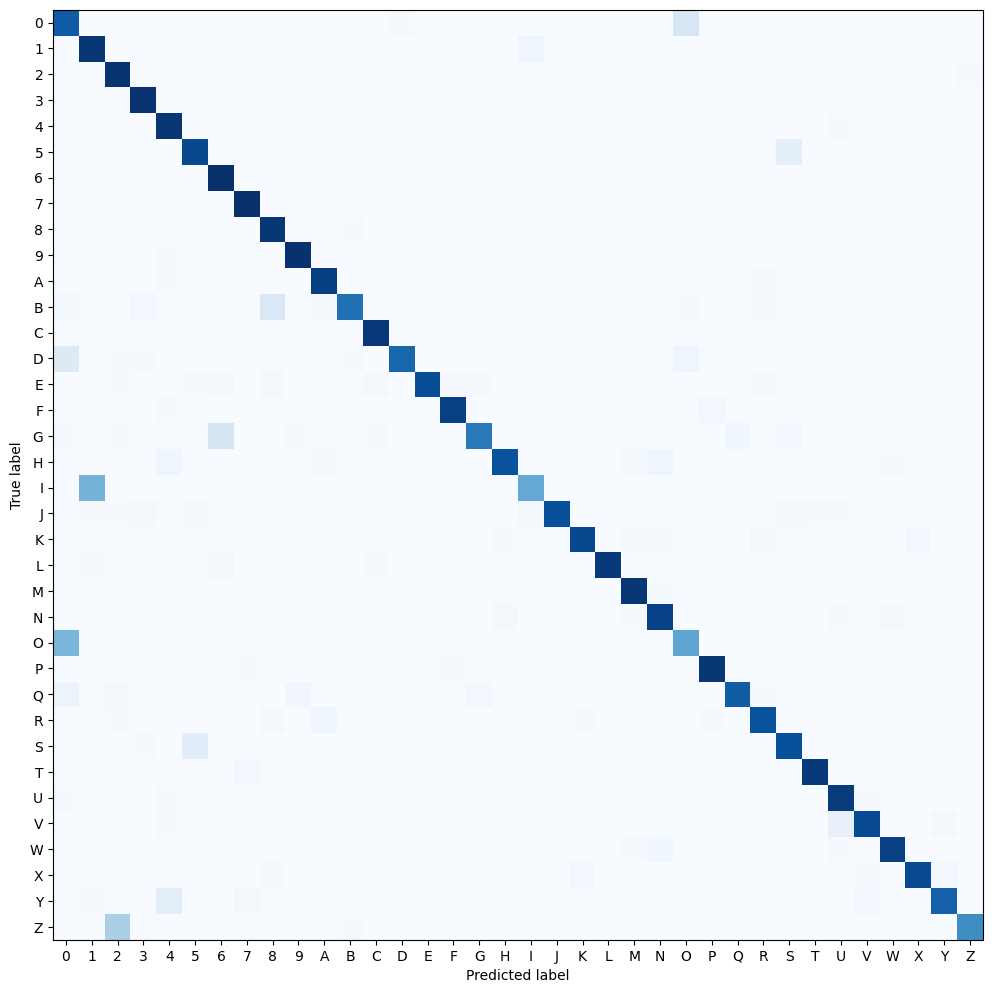

In [14]:
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

1/1 [==============================] - 0s 475ms/step


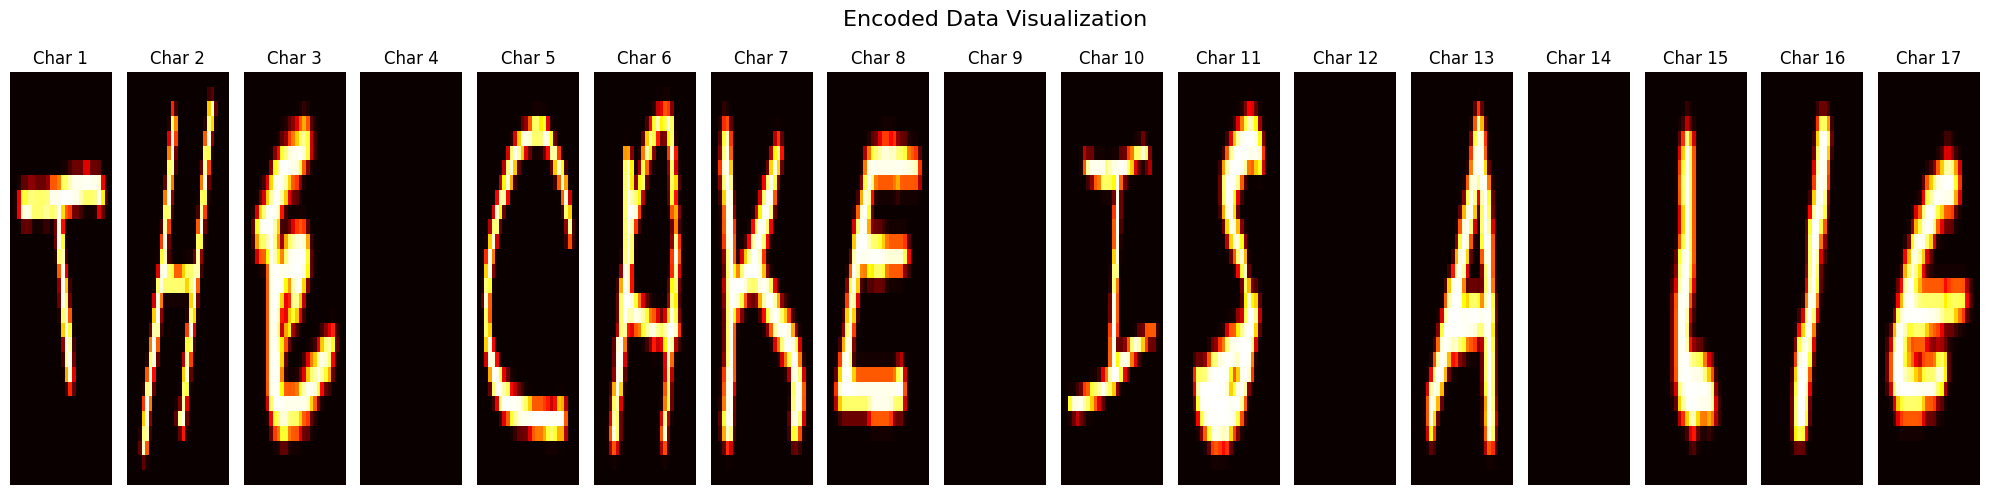

'decoded message is: THE CAKE IS A L16'

In [17]:
importlib.reload(emnist_fcn);
import numpy as np
fileName = "/scratch/modules/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)